# Application 1: évaluation d’impact à assignation aléatoire (randomisée)

Cette application consiste à analyser les données provenant d’une évaluation d’impact à assignation aléatoire (randomisée). 

Les données associées à cette application se trouve sur e-campus. Elles proviennent de l’article de Rebecca Thornton
“The Demand and Impact of Learning HIV Status” (American Economic Review, 2008). 

Le but est d’évaluer si une baisse des coûts liés à l’obtention des résultats de tests VIH amène à une hausse du nombre de personnes qui cherchent à obtenir leurs résultats. Il y a deux interventions : 

1) un paiement en cash aux personnes qui viennent chercher leurs résultats, 
2) une variation dans le montant de l’incitation monétaire promise aux personnes qui viennent chercher leurs résultats. 



In [110]:
import numpy as np
import pandas as pd
from random import seed
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import statsmodels.api as sm

Question 1

In [77]:
data = pd.read_excel('D:/ENS Paris Saclay/Evaluation de Politique/Application/RCT.xlsx')
data

,got,Ti,any,age,male,educ2004,hadsex12,eversex,tb,land2004,hiv2004
0,1,200,1,18,1,8.0,1.0,1,0,1.0,0
1,1,100,1,19,1,7.0,NaN,0,0,0.0,0
2,0,100,1,21,1,11.0,NaN,0,1,0.0,0
3,1,200,1,38,0,0.0,1.0,1,0,1.0,0
4,1,200,1,54,1,0.0,1.0,1,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1144,0,0,0,15,0,3.0,NaN,0,0,0.0,0
1145,0,0,0,80,1,0.0,0.0,1,1,1.0,0
1146,0,0,0,32,0,NaN,NaN,1,0,NaN,0
1147,1,0,0,34,0,0.0,1.0,1,0,1.0,0


Première partie - Statistiques descriptives 

Q1. Présentez les statistiques descriptives des variables âge, genre, éducation, activité sexuelle,
dépistage avant l’intervention, statut VIH avant l’intervention etc. Commentez vos résultats. 

In [41]:
data.describe()

,got,Ti,any,age,male,educ2004,hadsex12,eversex,tb,land2004,hiv2004
count,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1021.000000,950.000000,1149.000000,1149.000000,1050.000000,1149.000000
mean,0.683203,119.277633,0.780679,33.464752,0.467363,3.625857,0.767368,0.918190,0.186249,0.741905,0.057441
std,0.465430,101.386299,0.413967,13.757856,0.499151,3.745727,0.422732,0.274195,0.389477,0.437795,0.232785
min,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50.000000,1.000000,22.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,100.000000,1.000000,32.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,200.000000,1.000000,43.000000,1.000000,7.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,300.000000,1.000000,80.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Q2. Présentez séparément ces résultats pour le groupe de traitement et le groupe de contrôle. 
Pour chaque variable, faites un test statistique pour évaluer s’il existe des différences
significatives (au seuil de 5%) entre les groupes de traitement et de contrôle.
Commentez vos résultats. En particulier, si vous trouvez des différences significatives, 
indiquez en quoi est-ce que cela peut affecter les résultats de l’évaluation d’impact. 

In [78]:
x = data['any']
x = sm.add_constant(x)

In [79]:
var = ['age','male','educ2004','hadsex12','eversex','tb','land2004','hiv2004']

In [80]:
result = sm.OLS(data['age'],x).fit()

In [81]:
for i in var: 
    result = sm.OLS(data[i],x).fit()
    print('Test de différence en:', i)
    print(result.summary())

Test de différence en: age
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.098
Date:                Tue, 19 Mar 2024   Prob (F-statistic):             0.0432
Time:                        12:02:33   Log-Likelihood:                -4640.0
No. Observations:                1149   AIC:                             9284.
Df Residuals:                    1147   BIC:                             9294.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.9167    

II.	Deuxième partie - Analyse graphique 

1. Faites un histogramme, où figure en abscisses les catégories « traitement » et « contrôle », et en ordonnées le 
pourcentage des individus de chacun de ces groupes qui est allé chercher ses résultats après l’intervention. 
Commentez vos résultats. 

In [82]:
result = sm.OLS(data['got'],x).fit()

In [83]:
res = pd.read_html(result.summary().tables[1].as_html(),header=0,index_col=0)[0]
res

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.3175,0.027,11.906,0.0,0.265,0.370
any,0.4685,0.030,15.524,0.0,0.409,0.528


In [84]:
res['coef'].values[1],res['coef'].values[0]

(0.4685, 0.3175)

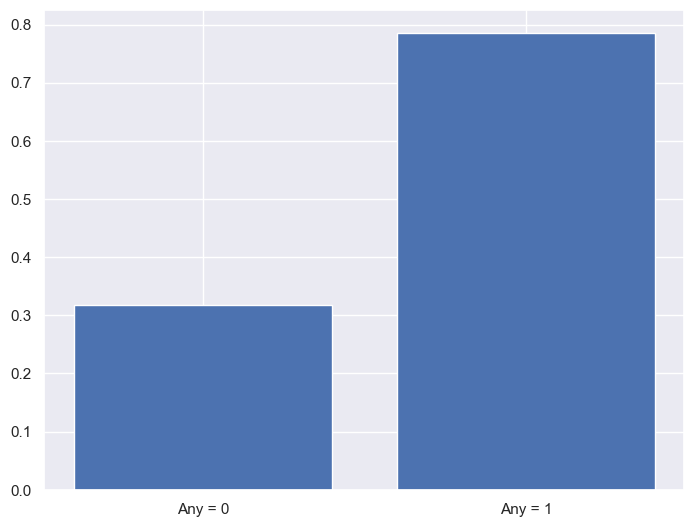

In [85]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xaxis = ['Any = 0', 'Any = 1']
yaxis = [res['coef'].values[0],res['coef'].values[0]+res['coef'].values[1]]
ax.bar(xaxis,yaxis)
plt.show()

In [86]:
xaxis, yaxis

(['Any = 0', 'Any = 1'], [0.3175, 0.786])

2.Refaites le même graphique, mais cette fois les catégories en abscisses sont les différents montants d’incitation
monétaires. Commentez vos résultats. 

In [87]:
setTI = set(np.array(data['Ti'].values))
setTI

{0, 50, 100, 200, 300}

In [88]:
data['dum_0'] = (data['Ti']==0).map({True:1,False:0})
data['dum_50'] = (data['Ti']==50).map({True:1,False:0})
data['dum_100'] = (data['Ti']==100).map({True:1,False:0})
data['dum_200'] = (data['Ti']==200).map({True:1,False:0})
data['dum_300'] = (data['Ti']==300).map({True:1,False:0})

In [89]:
data

,got,Ti,any,age,male,educ2004,hadsex12,eversex,tb,land2004,hiv2004,dum_0,dum_50,dum_100,dum_200,dum_300
0,1,200,1,18,1,8.0,1.0,1,0,1.0,0,0,0,0,1,0
1,1,100,1,19,1,7.0,NaN,0,0,0.0,0,0,0,1,0,0
2,0,100,1,21,1,11.0,NaN,0,1,0.0,0,0,0,1,0,0
3,1,200,1,38,0,0.0,1.0,1,0,1.0,0,0,0,0,1,0
4,1,200,1,54,1,0.0,1.0,1,0,1.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,0,0,0,15,0,3.0,NaN,0,0,0.0,0,1,0,0,0,0
1145,0,0,0,80,1,0.0,0.0,1,1,1.0,0,1,0,0,0,0
1146,0,0,0,32,0,NaN,NaN,1,0,NaN,0,1,0,0,0,0
1147,1,0,0,34,0,0.0,1.0,1,0,1.0,0,1,0,0,0,0


In [90]:
z = data[['dum_50','dum_100','dum_200','dum_300']]
z = sm.add_constant(z)

In [91]:
result = sm.OLS(data['got'],z).fit()

In [92]:
res = pd.read_html(result.summary().tables[1].as_html(),header=0,index_col=0)[0]
res

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.3175,0.026,12.052,0.0,0.266,0.369
dum_50,0.3579,0.038,9.396,0.0,0.283,0.433
dum_100,0.4399,0.038,11.651,0.0,0.366,0.514
dum_200,0.5429,0.037,14.757,0.0,0.471,0.615
dum_300,0.5467,0.042,12.984,0.0,0.464,0.629


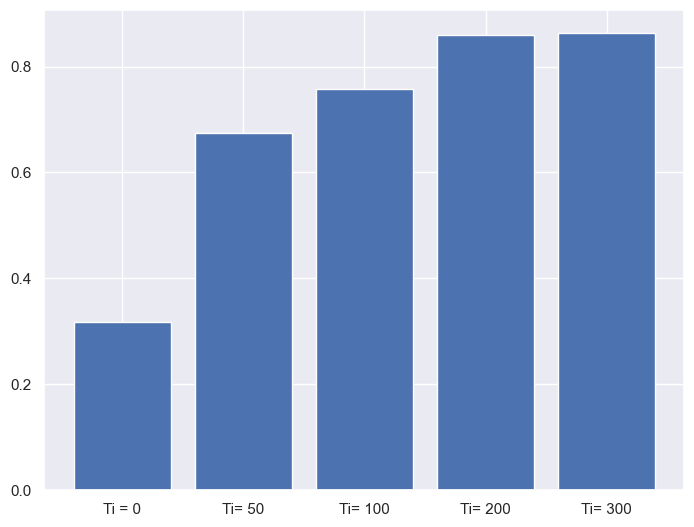

In [93]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xaxis = ['Ti = 0', 'Ti= 50', 'Ti= 100','Ti= 200', 'Ti= 300']
yaxis = [res['coef'].values[0],
         res['coef'].values[0]+res['coef'].values[1],
         res['coef'].values[0]+res['coef'].values[2],
         res['coef'].values[0]+res['coef'].values[3],
         res['coef'].values[0]+res['coef'].values[4]]
ax.bar(xaxis,yaxis)
plt.show()

In [94]:
xaxis, yaxis

(['Ti = 0', 'Ti= 50', 'Ti= 100', 'Ti= 200', 'Ti= 300'],
 [0.3175, 0.6754, 0.7574000000000001, 0.8604, 0.8642])

III. Troisième partie - Analyse sur la base de régressions linéaires 

1.	Faites une première estimation de l’effet d’avoir reçu une incitation monétaire (quel que soit son montant) sur la probabilité d’être allé chercher son résultat de test (variable « got »). Commentez vos résultats (du point de vue de la significativité statistique mais également de l’interprétation du niveau du coefficient). 


In [95]:
x = data['any']
x = sm.add_constant(x)
y = data['got']

In [96]:
result = sm.OLS(y,x).fit()

In [97]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    got   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     241.0
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.78e-49
Time:                        12:18:23   Log-Likelihood:                -641.55
No. Observations:                1149   AIC:                             1287.
Df Residuals:                    1147   BIC:                             1297.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3175      0.027     11.906      0.0

2.	Refaites la même estimation, mais cette fois en ajoutant des variables de contrôle comme l’âge ou le genre. Comment cela a-t-il affecté vos résultats ? 


In [98]:
x = data[['any','age','male']]
x = sm.add_constant(x)
y = data['got']

In [100]:
result = sm.OLS(y,x).fit()

In [101]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    got   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     81.08
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.45e-47
Time:                        12:21:37   Log-Likelihood:                -640.44
No. Observations:                1149   AIC:                             1289.
Df Residuals:                    1145   BIC:                             1309.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2948      0.041      7.206      0.0

3.	Refaites la même estimation, mais cette fois en utilisant le niveau de l’incitation à la place de la variable binaire. Pour plus de précision, refaites une fois encore cette estimation, en utilisant le caractère catégoriel de cette variable. Commentez vos résultats. 


In [102]:
x = data[['Ti','age','male']]
x = sm.add_constant(x)
y = data['got']

In [103]:
result = sm.OLS(y,x).fit()

In [104]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    got   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     62.20
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           2.95e-37
Time:                        12:25:13   Log-Likelihood:                -664.38
No. Observations:                1149   AIC:                             1337.
Df Residuals:                    1145   BIC:                             1357.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4412      0.038     11.608      0.0

In [107]:
x = data[['dum_50','dum_100','dum_200','dum_300','age','male']]
x = sm.add_constant(x)
y = data['got']

In [108]:
result = sm.OLS(y,x).fit()

In [109]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    got   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     47.13
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           9.04e-52
Time:                        12:26:46   Log-Likelihood:                -624.02
No. Observations:                1149   AIC:                             1262.
Df Residuals:                    1142   BIC:                             1297.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2924      0.040      7.240      0.0

4.	Faites un résumé de vos résultats. Trouvez-vous que l’incitation monétaire a un effet important ? Y a-t-il une grande différence entre une incitation monétaire de 1$ et de 2$ ? 

In [71]:
result.t_test("dum_100 = dum_200")

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.1077      0.037     -2.883      0.004      -0.181      -0.034

In [72]:
data['male_any']=data['male']*data['any']

In [73]:
x = data[['any','age','male','male_any']]
x = sm.add_constant(x)
y = data['got']

In [74]:
result = sm.OLS(y,x).fit()

In [75]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    got   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     60.85
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.21e-46
Time:                        11:16:24   Log-Likelihood:                -640.28
No. Observations:                1149   AIC:                             1291.
Df Residuals:                    1144   BIC:                             1316.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3076      0.047      6.579      0.0